In [1]:
import os
os.environ["KERAS_BACKEND"] = "theano"

import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\users\isabel\appdata\local\programs\python\python37-32\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Projeto Rede Neural

In [2]:
file = pd.read_csv('data50.csv')

In [3]:
file.shape

(17342, 7)

In [4]:
file = file.drop(columns="Adj Close")

In [5]:
BigMA = 120
BigMA2 = 150
BigMA3 = 180
BigMA4 = 200
VerySmallMA = 3
SmallMA = 10
SmallMA2 = 15
SmallMA3 = 20
SmallMA4 = 30
AvgMA = 40
AvgMA2 = 80
file['MAVeySmall'] = file['Close'].rolling(window=VerySmallMA).mean()
file['MASmall'] = file['Close'].rolling(window=SmallMA).mean()
file['MASmall2'] = file['Close'].rolling(window=SmallMA2).mean()
file['MASmall3'] = file['Close'].rolling(window=SmallMA3).mean()
file['MASmall4'] = file['Close'].rolling(window=SmallMA4).mean()
file['MAAvg'] = file['Close'].rolling(window=AvgMA).mean()
file['MAAvg2'] = file['Close'].rolling(window=AvgMA2).mean()
file['MABig'] = file['Close'].rolling(window=BigMA).mean()
file['MABig2'] = file['Close'].rolling(window=BigMA2).mean()
file['MABig3'] = file['Close'].rolling(window=BigMA3).mean()
file['MABig4'] = file['Close'].rolling(window=BigMA4).mean()

In [6]:
file.tail(5)

,Date,Open,High,Low,Close,Volume,MAVeySmall,MASmall,MASmall2,MASmall3,MASmall4,MAAvg,MAAvg2,MABig,MABig2,MABig3,MABig4
17337,2018-11-26,2649.969971,2674.350098,2649.969971,2673.449951,3443950000,2651.979981,2690.500977,2720.033317,2714.977490,2724.098657,2758.240497,2819.342743,2805.777336,2785.020534,2765.332332,2761.003550
17338,2018-11-27,2663.750000,2682.530029,2655.889893,2682.169922,3485220000,2662.726644,2686.095972,2716.290641,2717.023486,2721.811320,2752.179993,2817.365491,2805.042334,2785.305667,2764.870443,2761.134399
17339,2018-11-28,2691.449951,2744.000000,2684.379883,2743.790039,3951670000,2699.803304,2688.256983,2715.513314,2720.081494,2719.606991,2747.688995,2816.032867,2804.748667,2785.818001,2764.838832,2761.538650
17340,2018-11-29,2736.969971,2753.750000,2722.939941,2737.800049,3560770000,2721.253337,2691.878980,2710.440658,2721.384497,2717.226660,2742.996246,2814.524744,2804.380335,2786.270602,2764.785887,2761.734501
17341,2018-11-30,2737.760010,2760.879883,2732.760010,2760.159912,4658580000,2747.250000,2694.874976,2707.329313,2722.373987,2716.939323,2739.459991,2813.305493,2804.157916,2787.018001,2764.831165,2761.879301


In [7]:
file.columns[6:]

Index(['MAVeySmall', 'MASmall', 'MASmall2', 'MASmall3', 'MASmall4', 'MAAvg',
       'MAAvg2', 'MABig', 'MABig2', 'MABig3', 'MABig4'],
      dtype='object')

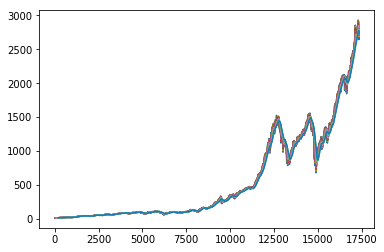

In [8]:
for i in file.columns[6:]:
    plt.plot(file[i])

## Machine Learning

In [9]:
variacao = []
for i in range(len(file['Close'])-10):
    variacao.append(100 * (file['Close'][i+10]/file['Close'][i] - 1))

In [10]:
file['target'] = pd.DataFrame(variacao)

In [11]:
matrix = file.as_matrix()

c:\users\isabel\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


m is the data matrix with everything exepet date and starting at line 149 (because of MA) and ending before last 10 lines (because of variation that predicts for the next 10 days)

In [12]:
m = np.array(matrix[199:len(matrix)-10,1:])

X is m without the variation column

In [13]:
X = m[:,:len(m[0])-1]

Y is only yhe variation column

In [14]:
Y = m[:,-1]

Normalization

In [15]:
X = preprocessing.scale(X)

c:\users\isabel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
c:\users\isabel\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [16]:
Y

array([-2.2488805597201567, -1.4485514485514495, -0.551097221998853, ...,
       0.7938529979582443, 1.3406958133483915, 1.0973540963190809],
      dtype=object)

In [17]:
X

array([[-0.81966482, -0.82054345, -0.81884906, ..., -0.82436445,
        -0.82509899, -0.82560405],
       [-0.81964996, -0.82052866, -0.81883412, ..., -0.82433876,
        -0.82507374, -0.82557824],
       [-0.81973913, -0.82061738, -0.81892377, ..., -0.82431327,
        -0.82504899, -0.82555436],
       ...,
       [ 3.20750393,  3.22275895,  3.20798192, ...,  3.38942823,
         3.38352369,  3.38851926],
       [ 3.21916895,  3.21122598,  3.16430641, ...,  3.38988804,
         3.38372703,  3.38758062],
       [ 3.15321964,  3.19434038,  3.14189338, ...,  3.39041975,
         3.38405827,  3.38687582]])

In [18]:
model = Sequential()
model.add(Dense(12, input_dim=len(X[0]), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='tanh'))

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(X, Y, epochs=100, batch_size=128)

Epoch 1/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5927 - acc: 0.0012
Epoch 2/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5882 - acc: 0.0012
Epoch 3/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5870 - acc: 0.0012
Epoch 4/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5864 - acc: 0.0012
Epoch 5/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5917 - acc: 0.0012
Epoch 6/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5803 - acc: 0.0012
Epoch 7/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5810 - acc: 0.0012
Epoch 8/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5788 - acc: 0.0012
Epoch 9/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5803 - acc: 0.0012
Epoch 10/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5795 - a

17133/17133 [==============================] - 34s 2ms/step - loss: 8.5254 - acc: 0.0012
Epoch 82/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5200 - acc: 0.0012
Epoch 83/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5198 - acc: 0.0012
Epoch 84/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5244 - acc: 0.0012
Epoch 85/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5241 - acc: 0.0012
Epoch 86/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5266 - acc: 0.0012
Epoch 87/100
17133/17133 [==============================] - 35s 2ms/step - loss: 8.5226 - acc: 0.0011
Epoch 88/100
17133/17133 [==============================] - 35s 2ms/step - loss: 8.5278 - acc: 0.0011
Epoch 89/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5216 - acc: 0.0012
Epoch 90/100
17133/17133 [==============================] - 34s 2ms/step - loss: 8.5184 - acc: 

In [43]:
scores = model.evaluate(X, Y)

17133/17133 [==============================] - 17s 969us/step


In [44]:
import math
math.sqrt(scores[0])

2.9179890442538072

In [45]:
Y.mean()

0.3308839650397523

In [46]:
Y.std()

2.9433353342589275